In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_frame = pd.read_csv('BankNote_Authentication.csv')

In [3]:
data_values = data_frame.values

In [4]:
data = data_values[:,:-1]

In [5]:
class_array = data_values[:,-1]

**Normalize the data**

In [6]:
data_nor = (data-data.mean())/data.std()

**Covariance Matrix**

In [7]:
S_dat = (1/(len(data_nor)-1))*np.dot(data_nor.T, data_nor)

**Variance of each variable**

In [8]:
nor_var = [np.var(data_nor[:,0]), np.var(data_nor[:,1]),np.var(data_nor[:,2]), np.var(data_nor[:,3])]

**Eigen values and Eigen vector**

In [9]:
eigenvalues, eigenvector = np.linalg.eig(S_dat)

**Proportion of variance**

In [10]:
pro_var = (eigenvalues/np.sum(eigenvalues))

**Sorting of eigenvalues and eigenvector in descending order**

In [11]:
ind = np.argsort(eigenvalues)[::-1]
eigVal_sorted = eigenvalues[ind]
eigVec_sorted = eigenvector[:, ind]

**Project data into new 2D space with various eigenvectors combinations**

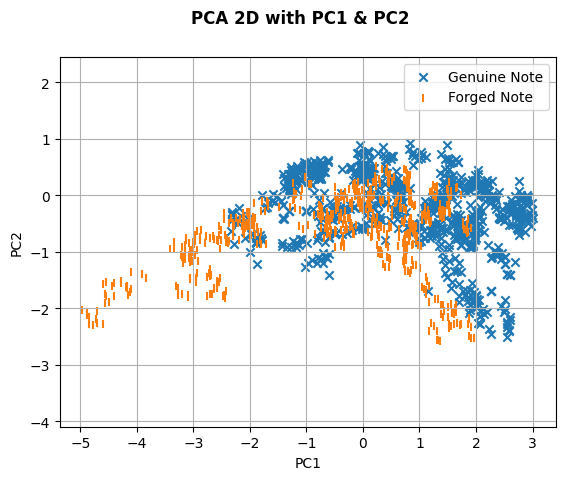

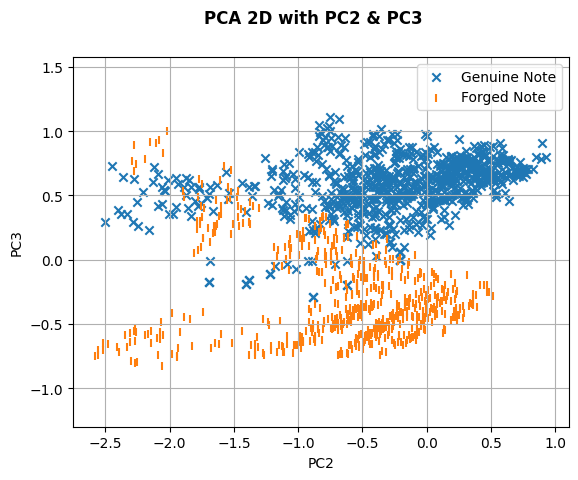

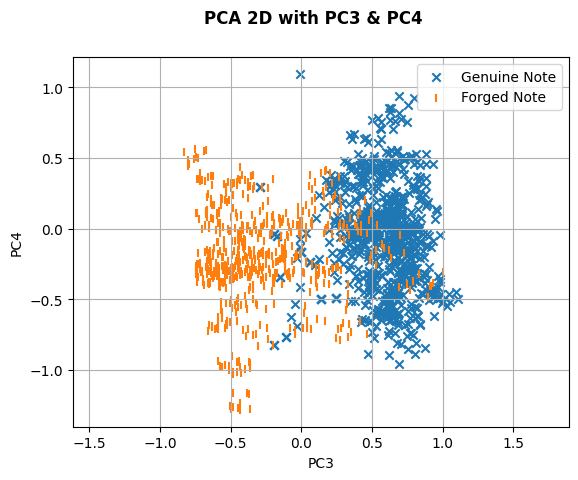

In [12]:
for i in range(3):
    Y_2d = np.dot(eigVec_sorted[:, i:i+2].T,data_nor.T)
    Y_2d = Y_2d.T
    X_pca_class0 = Y_2d[class_array == 0,:]
    X_pca_class1 = Y_2d[class_array == 1,:]
    plt.figure("PCA with PC"+str(i+1)+" & PC"+str(i+2))
    plt.suptitle("PCA 2D with PC"+str(i+1)+" & PC"+str(i+2), fontweight='bold')
    plt.scatter(X_pca_class0[:,0],X_pca_class0[:,1], marker='x', label = "Genuine Note")
    plt.scatter(X_pca_class1[:,0],X_pca_class1[:,1], marker= '|', label = "Forged Note")
    plt.legend()
    plt.xlabel("PC"+str(i+1))
    plt.ylabel("PC"+str(i+2))
    plt.axis('equal')
    plt.grid(True)
    plt.show()

**Project data into new 3D space with various eigenvectors combinations**

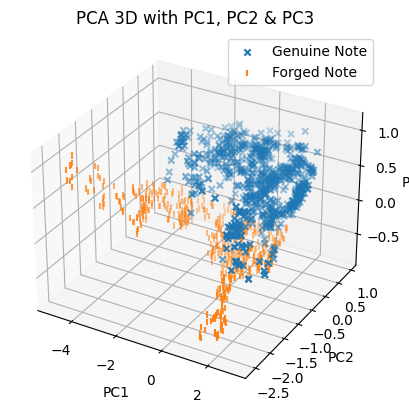

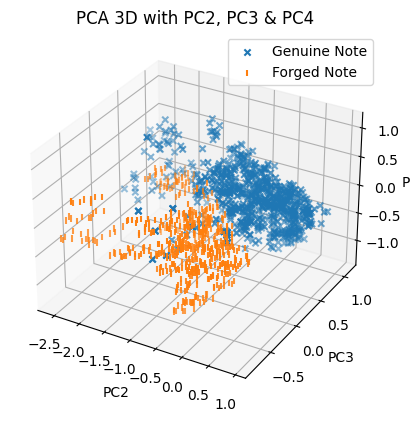

In [13]:
for i in range(2):
    Y_3d = np.dot(eigVec_sorted[:, i:i+3].T,data_nor.T)
    Y_3d = Y_3d.T
    X3_pca_class0 = Y_3d[class_array == 0,:]
    X3_pca_class1 = Y_3d[class_array == 1,:]

    plt.figure("PCA 3D")
    ax = plt.axes(projection='3d')
    ax.set_title('PCA 3D with PC'+str(i+1)+', PC'+str(i+2)+' & PC'+str(i+3))
    ax.scatter3D(X3_pca_class0[:,0],X3_pca_class0[:,1],X3_pca_class0[:,2], marker='x', label = "Genuine Note")
    ax.scatter3D(X3_pca_class1[:,0],X3_pca_class1[:,1],X3_pca_class1[:,2], marker='|', label = "Forged Note")
    ax.set_xlabel('PC'+str(i+1))
    ax.set_ylabel('PC'+str(i+2))
    ax.set_zlabel('PC'+str(i+3))
    ax.legend()
    plt.show()